In [480]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.tree import plot_tree
#from graphviz import Source

#from sklearn.tree import convert_to_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

from sklearn import decomposition
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition   import PCA
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import confusion_matrix
from sklearn.kernel_approximation import RBFSampler

In [481]:
data =pd.read_excel(r"/home/vildeg/Code/Heart disease UCI/dataset.xlsx")

In [482]:
y = data['Target']
X= data.drop(['Target'], axis = 1)
X_train, X_t, y_train, y_t = train_test_split(X, y, test_size = 0.4, random_state = 15)
X_val, X_test, y_val, y_test = train_test_split(X_t, y_t, test_size = 0.5, random_state = 15)

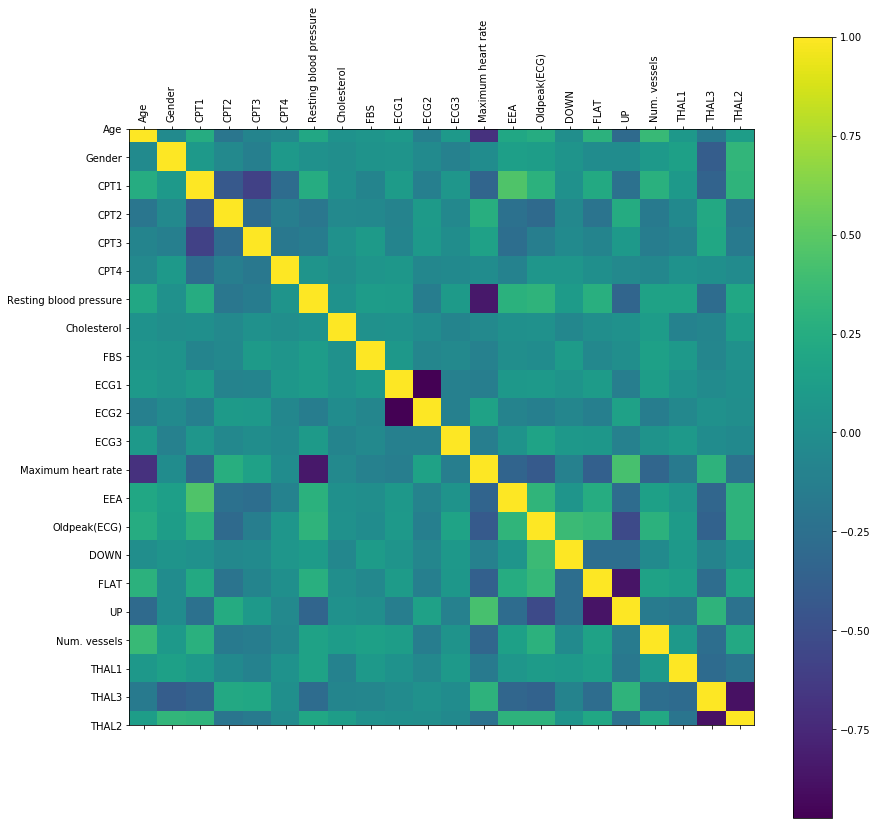

In [483]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(X.corr())
plt.yticks(np.arange(X.shape[1]), X.columns)
plt.xticks(np.arange(X.shape[1]), X.columns, rotation=90)
plt.colorbar()
plt.savefig(r"/home/vildeg/Code/Heart disease UCI/corr_matr.png")

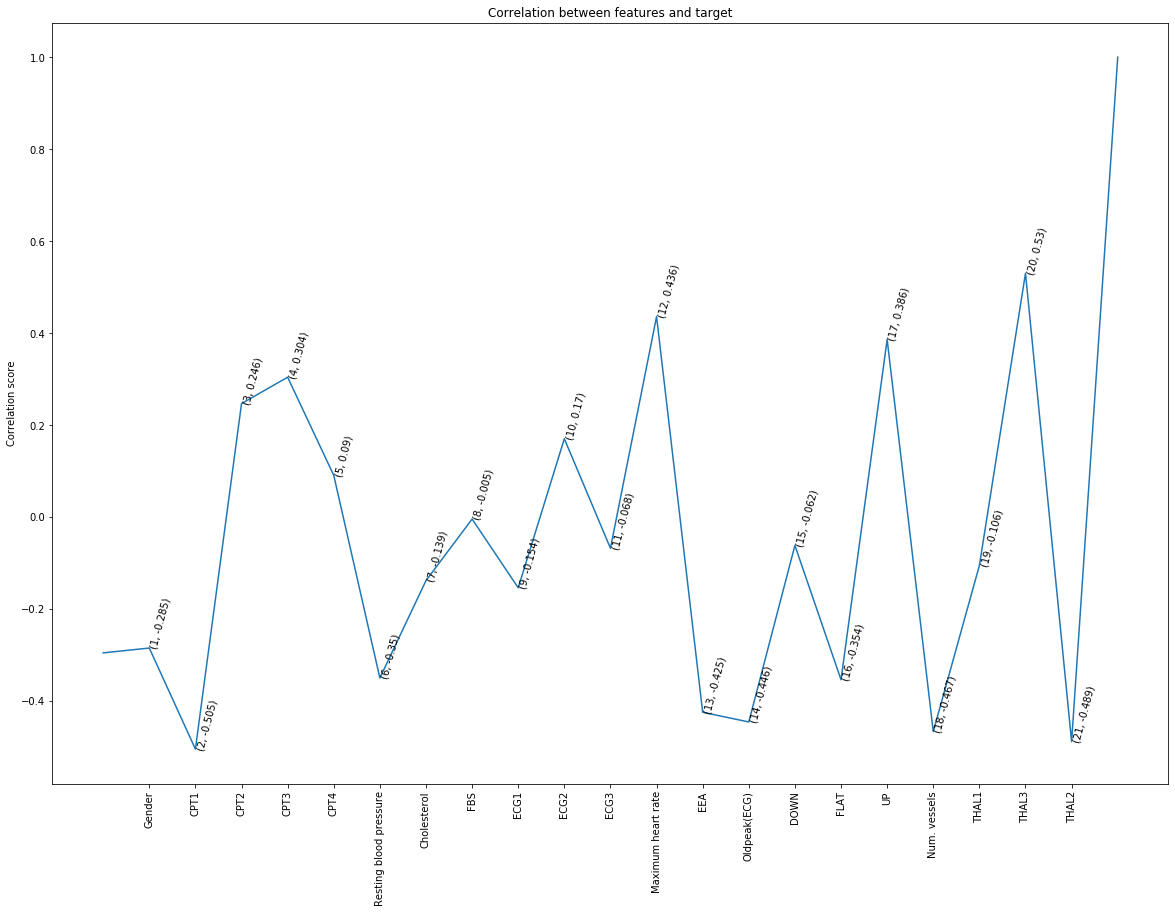

In [484]:
df = data.corr()
df = df['Target']
a = np.arange(len(X.columns))
plt.plot(df)
for i in range(1, len(a)):
    plt.text(i, df[i], (i, round(df[i],3)), rotation=75)
plt.xticks([i for i in range(1, len(a))], rotation = 90)
plt.ylabel('Correlation score')
plt.title('Correlation between features and target')
plt.savefig(r"/home/vildeg/Code/Heart disease UCI/corr_plot.png")

# Logistic Regression

In [485]:
scores =[]
for s in ['newton-cg', 'lbfgs', 'sag', 'saga']:
    lr_model = LogisticRegression( solver=s,max_iter = 100).fit(X_train, y_train)
    score = lr_model.score(X_val,y_val)
    scores.append(score)
print(scores)

lr_model = LogisticRegression( solver='lbfgs',max_iter = 1000).fit(X_train, y_train)
score = lr_model.score(X_test,y_test)
print(score)

[0.8983050847457628, 0.8983050847457628, 0.8983050847457628, 0.8983050847457628]
0.7666666666666667


/home/vildeg/anaconda3/envs/AIX360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/vildeg/anaconda3/envs/AIX360/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[0 1 2 3]


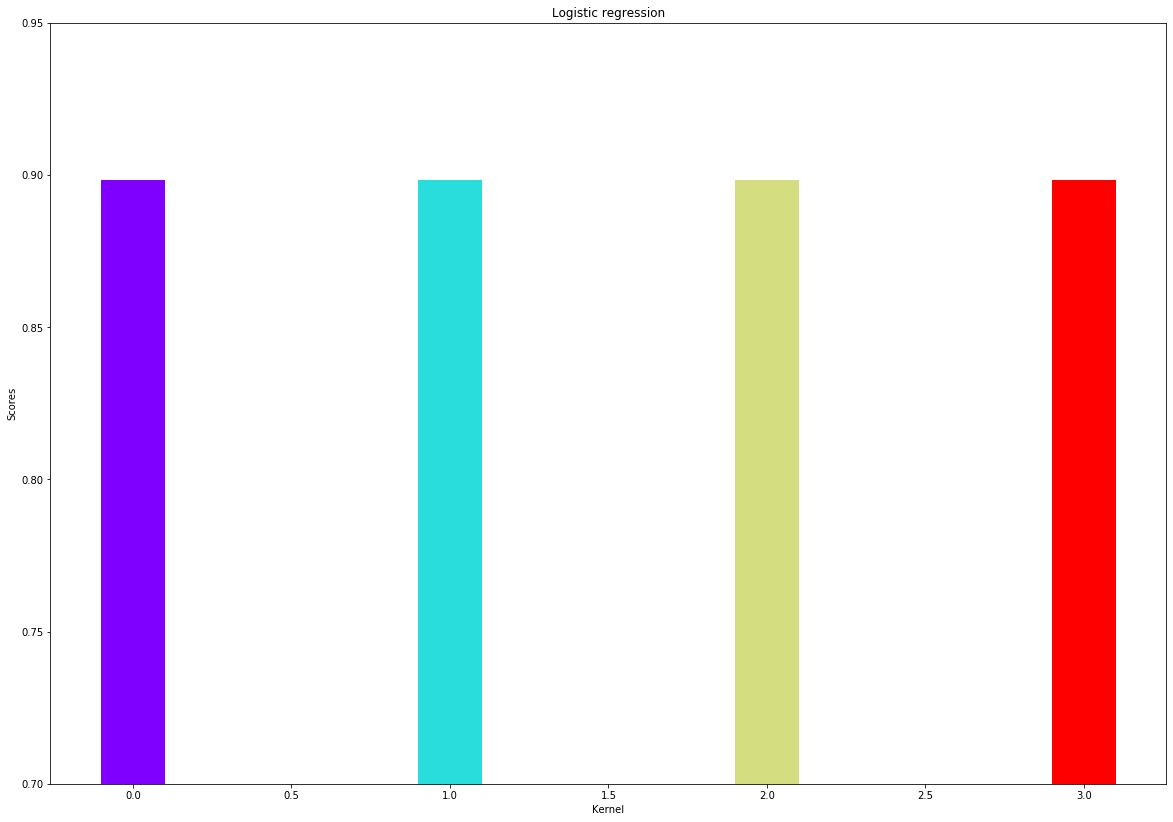

In [486]:

colors = rainbow(np.linspace(0, 1, len(scores)))
a = np.arange(len(scores))
print(a)
plt.bar(a, scores, color = colors, width = 0.2)
plt.ylim([0.7,0.95])
plt.xlabel('Kernel')
plt.ylabel('Scores')
plt.title('Logistic regression')
plt.savefig(r"/home/vildeg/Code/Heart disease UCI/LR.png")

# PCA + LR

In [487]:
pca_model = PCA(n_components=5).fit(X_train)
pca_X_train = pca_model.transform(X_train)
pca_X_test = pca_model.transform(X_test)
pca_X_val =pca_model.transform(X_val)


Accuraccy:  12  :  0.6666666666666666


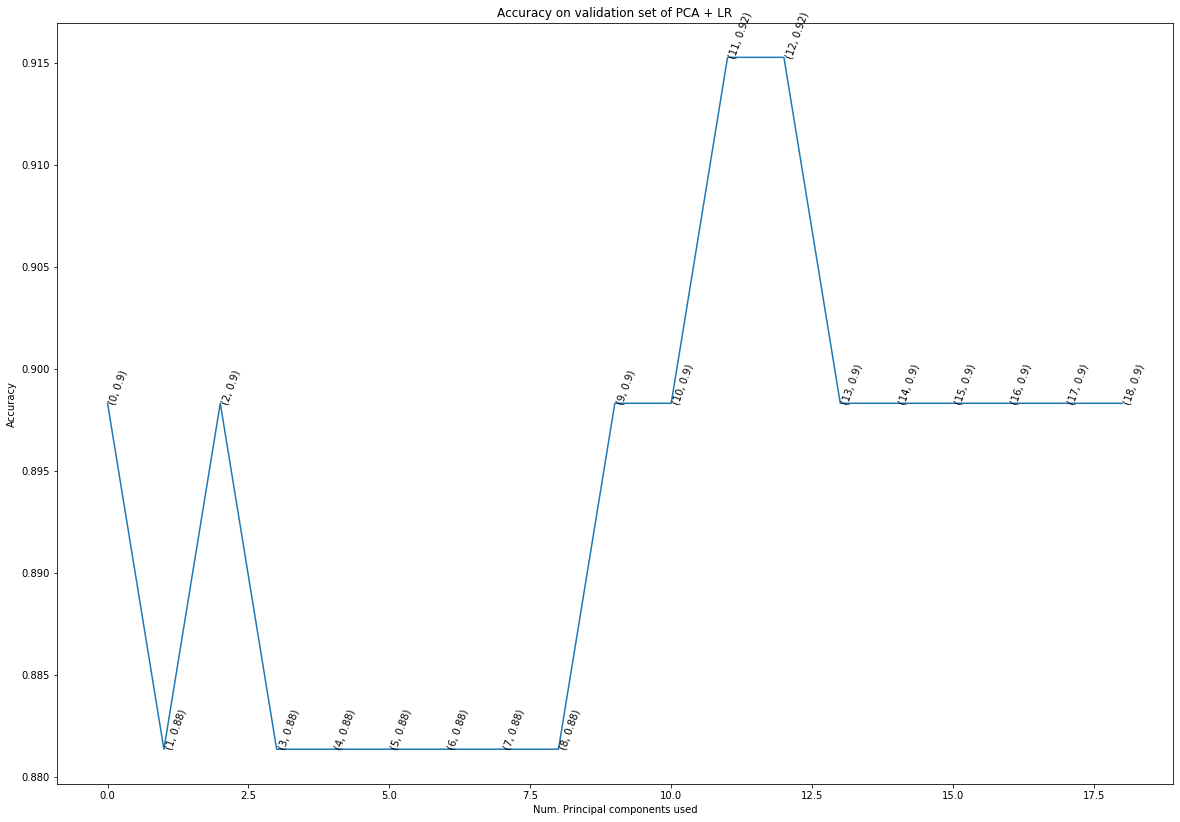

In [499]:
scores=[]
for i in range(1,20):
    pca = decomposition.PCA(n_components=i)
    pca.fit(X_train)
    pca_x_train = pca.transform(X_train)
    pca_x_val = pca.transform(X_val)
    reg = LogisticRegression( solver='lbfgs').fit(pca_x_train, y_train)
    score =reg.score(pca_x_val, y_val)
    scores.append(score)
    
plt.plot(scores)
for i in range(0,len(scores)):
    plt.text(i, scores[i], (i,round(scores[i],2)),rotation=70)
pca_indx = np.argmax(scores)
plt.ylabel("Accuracy")
plt.xlabel("Num. Principal components used")
plt.title("Accuracy on validation set of PCA + LR")
fig.savefig(r"/home/vildeg/Code/Heart disease UCI/1PCA_LR.png")



pca = decomposition.PCA(n_components=12)
pca.fit(x_train_transformed)
pca_x_train = pca.transform(x_train_transformed)
pca_x_val = pca.transform(x_val_transformed)
pca_x_test = pca.transform(x_test_transformed)
reg = LogisticRegression( solver='lbfgs').fit(pca_x_train, y_train)
score =reg.score(pca_x_test, y_test)
print("Accuraccy: " ,12," : ", score)

# RBF-kernel + LR

In [489]:
rbf_feature = RBFSampler(gamma=1, n_components = 500,random_state=1)
x_train_transformed = rbf_feature.fit_transform(X_train)
x_val_transformed = rbf_feature.fit_transform(X_val)
x_test_transformed = rbf_feature.fit_transform(X_test)

In [490]:
lr_model = LogisticRegression( solver='lbfgs').fit(x_train_transformed , y_train)
score = lr_model.score(x_test_transformed ,y_test)
print(score)

0.7166666666666667


# RBF-kernel + PCA + LR

Accuraccy:  7  :  0.7166666666666667


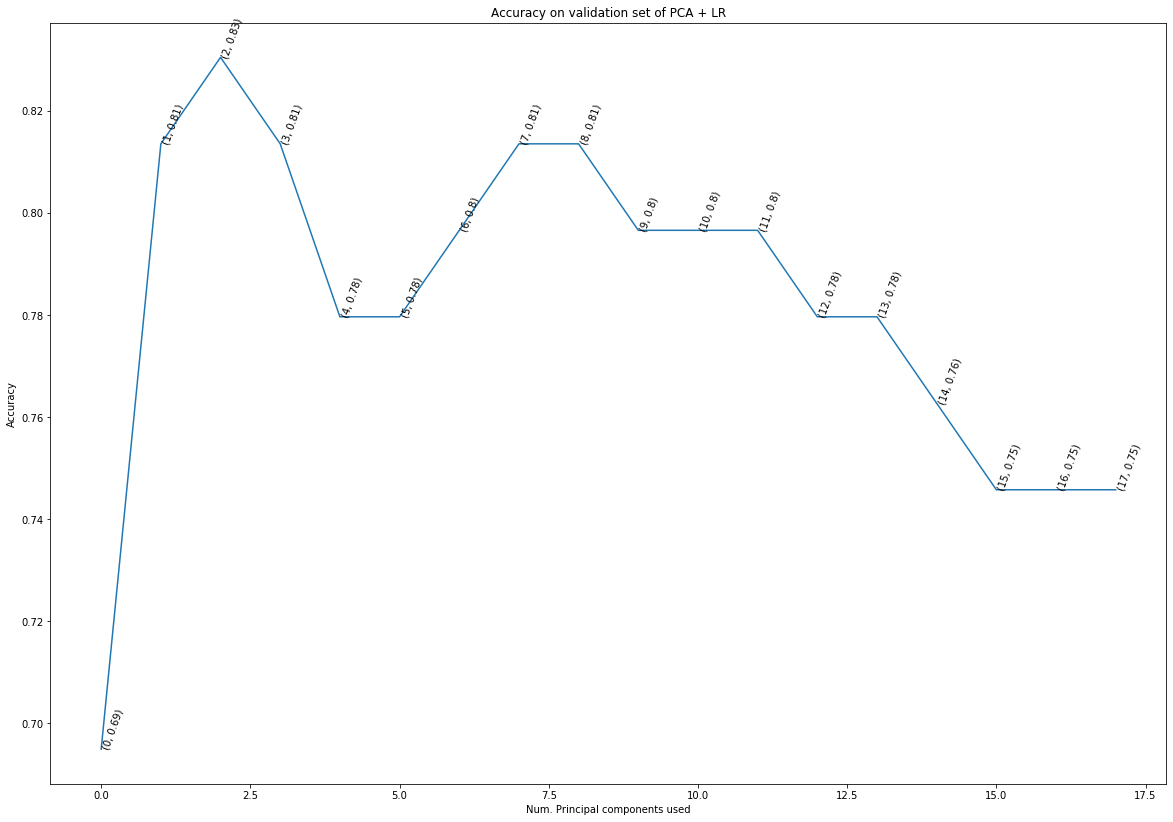

In [491]:
scores = []
for i in range(2,20):
    pca = decomposition.PCA(n_components=i)
    pca.fit(x_train_transformed)
    pca_x_train = pca.transform(x_train_transformed)
    pca_x_val = pca.transform(x_val_transformed)
    reg = LogisticRegression( solver='lbfgs').fit(pca_x_train, y_train)
    score =reg.score(pca_x_val, y_val)
    scores.append(score)

plt.plot(scores)
for i in range(0,len(scores)):
    plt.text(i, scores[i], (i,round(scores[i],2)),rotation=70)
indx = np.argmax(scores)
plt.ylabel("Accuracy")
plt.xlabel("Num. Principal components used")
plt.title("Accuracy on validation set of PCA + LR")
fig.savefig(r"/home/vildeg/Code/Heart disease UCI/1RBF_PCA_LR.png")
pca = decomposition.PCA(n_components=7)
pca.fit(x_train_transformed)
pca_x_train = pca.transform(x_train_transformed)
pca_x_val = pca.transform(x_val_transformed)
pca_x_test = pca.transform(x_test_transformed)
reg = LogisticRegression( solver='lbfgs').fit(pca_x_train, y_train)
score =reg.score(pca_x_test, y_test)
print("Accuraccy: " ,7," : ", score)

# Principal components

In [492]:
pca = decomposition.PCA(n_components=pca_indx+1)
pca.fit(X_train)
pca_x_test = pca.transform(X_test)
pca_x_train = pca.transform(X_train)
reg = LogisticRegression( solver='lbfgs').fit(pca_x_train, y_train)
score =reg.score(pca_x_test, y_test)
print(score)

0.7333333333333333


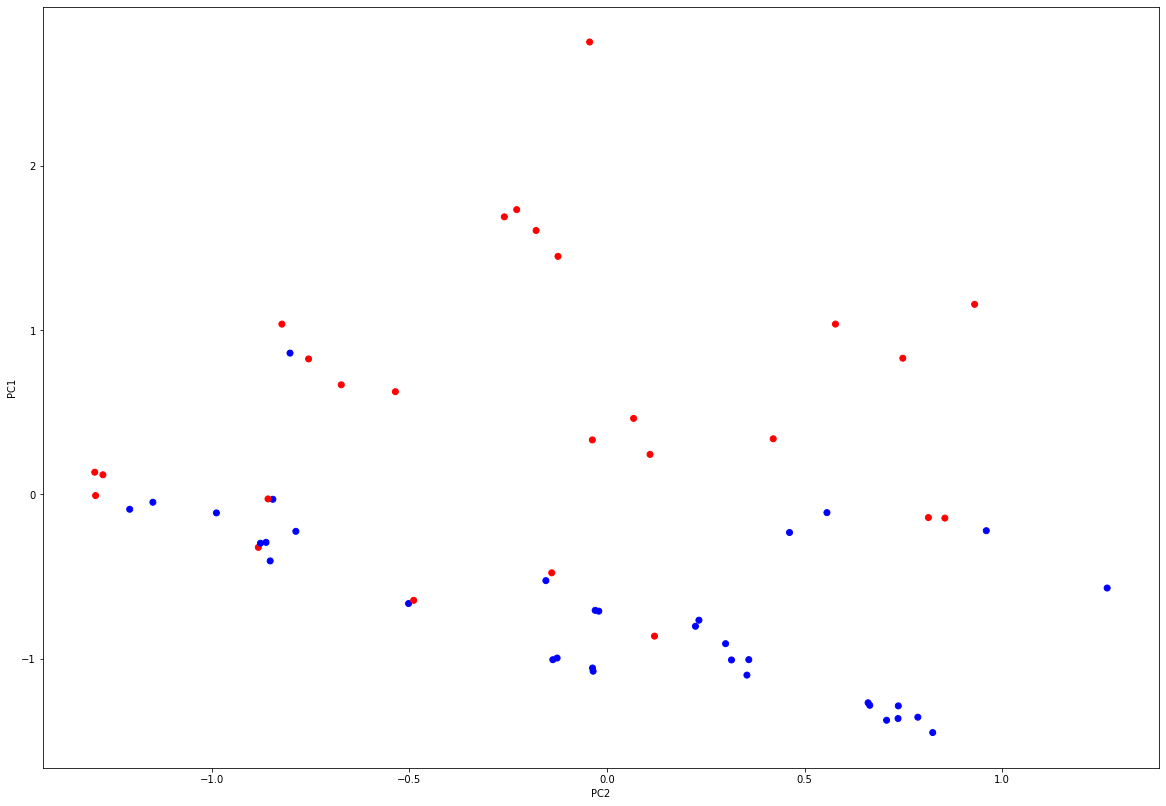

In [493]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l== 0:
            cols.append('red')
        elif l==1:
            cols.append('blue')
        else :
            cols.append('yellow')
    return cols
col = pltcolor(y_test)
plt.scatter(pca_x_test[:,1], pca_x_test[:,0], color = col)
plt.xlabel("PC2")
plt.ylabel("PC1")
fig.savefig(r"/home/vildeg/Code/Heart disease UCI/PCA_scatterplot.png")

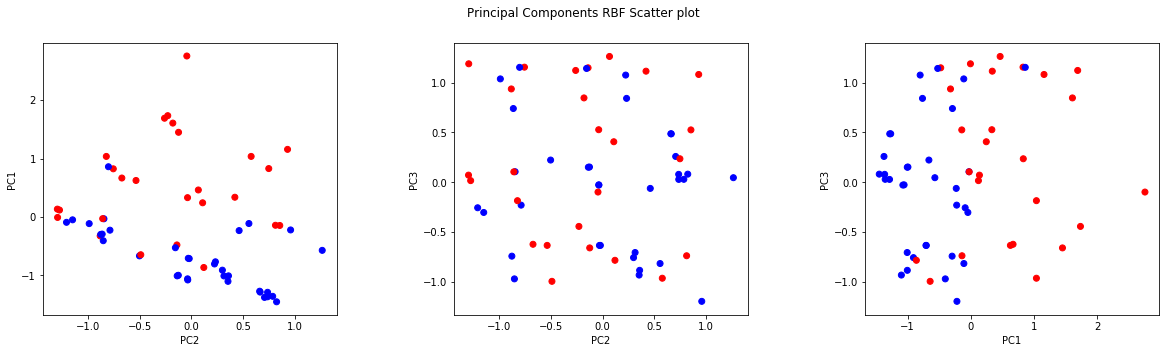

In [494]:


fig, (ax1, ax2,ax3) = plt.subplots(1,3, sharex=False, sharey = False, figsize=(20,5))
fig.subplots_adjust(wspace=0.4)
fig.suptitle('Principal Components RBF Scatter plot')
col = pltcolor(y_test)
ax1.scatter(pca_x_test[:,1], pca_x_test[:,0], color = col)
ax1.set_xlabel("PC2")
ax1.set_ylabel("PC1")

ax2.scatter(pca_x_test[:,1], pca_x_test[:,2], color = col)
ax2.set_xlabel("PC2")
ax2.set_ylabel("PC3")

ax3.scatter(pca_x_test[:,0], pca_x_test[:,2], color = col)
ax3.set_xlabel("PC1")
ax3.set_ylabel("PC3")

fig.savefig(r"/home/vildeg/Code/Heart disease UCI/PCA_scatterplot_3.png")

# PCR with kernel-transformation

## RBF kernel

RBFSampler(gamma=1, n_components=500, random_state=1)
4  PCA gives  0.8305084745762712 % accuracy


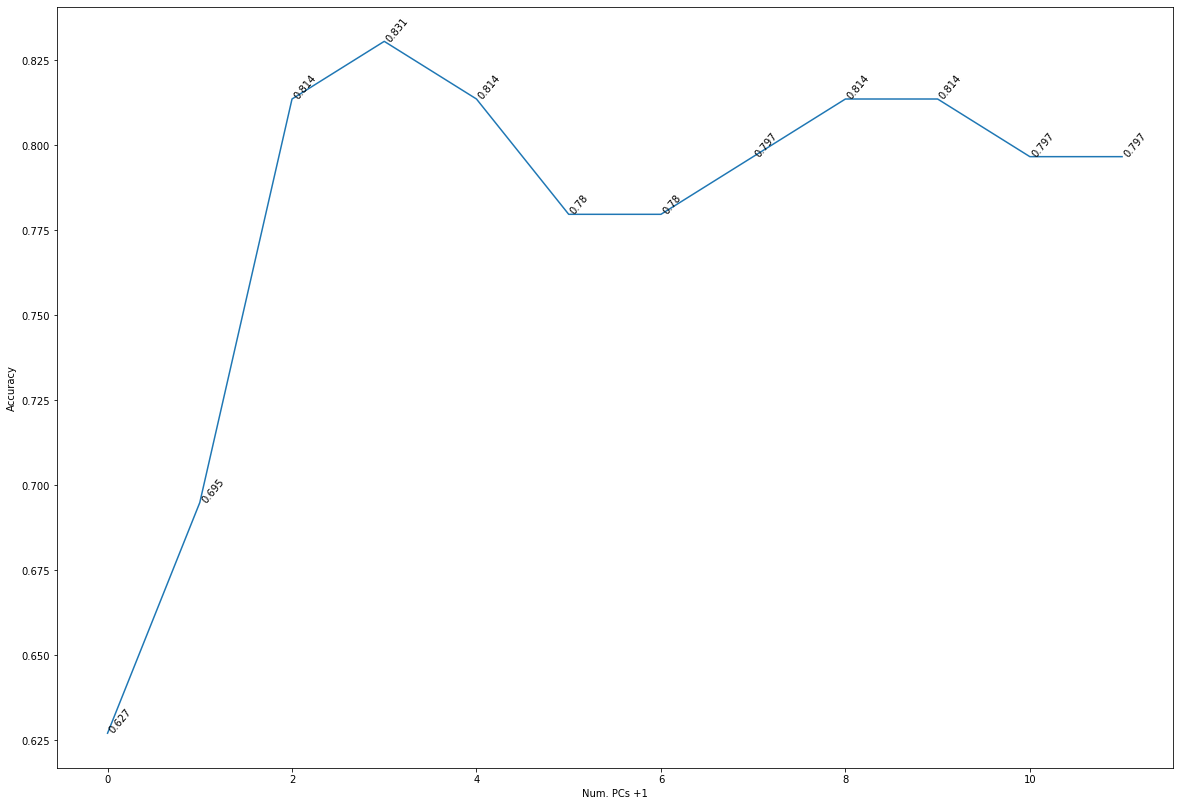

In [495]:
rbf_feature = RBFSampler(gamma=1, n_components = 500,random_state=1)
print(rbf_feature)
x_train_transformed = rbf_feature.fit_transform(X_train)
x_val_transformed = rbf_feature.fit_transform(X_val)
x_test_transformed = rbf_feature.fit_transform(X_test)

scores= []
for i in range(1,13):
    pca = decomposition.PCA(n_components=i)
    pca.fit(x_train_transformed)
    pca_x_val = pca.transform(x_val_transformed)
    pca_x_train = pca.transform(x_train_transformed)
    reg = LogisticRegression( solver='lbfgs').fit(pca_x_train, y_train)
    score =reg.score(pca_x_val, y_val)
    scores.append(score)
    

plt.plot(scores)
for i in range(0,12):
    plt.text(i, scores[i], round(scores[i],3),rotation=50)
indx = np.argmax(scores)
print(indx+1, " PCA gives ", scores[indx], "% accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Num. PCs +1")
plt.savefig(r"/home/vildeg/Code/Heart disease UCI/1rbf_kernel.png")

In [496]:
pca = decomposition.PCA(n_components=indx+1)
pca.fit(x_train_transformed)
pca_x_test = pca.transform(x_test_transformed)
pca_x_train = pca.transform(x_train_transformed)
reg = LogisticRegression( solver='lbfgs').fit(pca_x_train, y_train)
score =reg.score(pca_x_test, y_test)
print(score)

0.65


Text(0, 0.5, 'PC3')

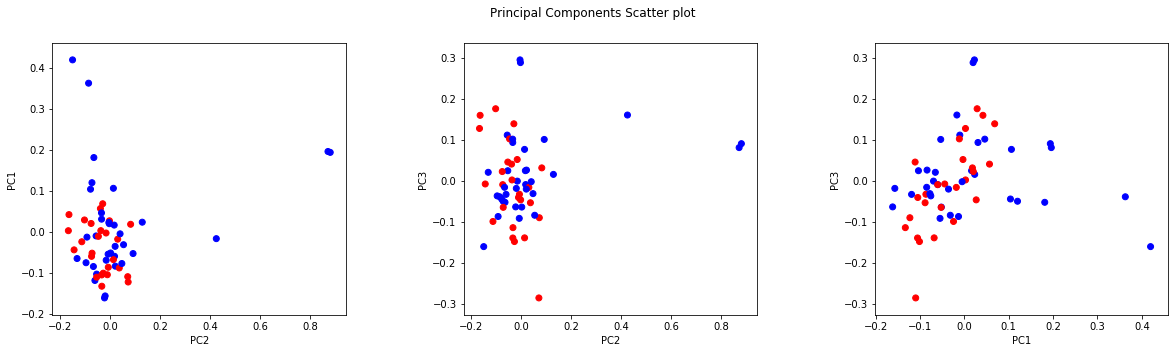

In [497]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l== 0:
            cols.append('red')
        elif l==1:
            cols.append('blue')
        else :
            cols.append('yellow')
    return cols

fig, (ax1, ax2,ax3) = plt.subplots(1,3, sharex=False, sharey = False, figsize=(20,5))
fig.subplots_adjust(wspace=0.4)
fig.suptitle('Principal Components Scatter plot')
col = pltcolor(y_test)
ax1.scatter(pca_x_test[:,1], pca_x_test[:,0], color = col)
ax1.set_xlabel("PC2")
ax1.set_ylabel("PC1")

ax2.scatter(pca_x_test[:,1], pca_x_test[:,2], color = col)
ax2.set_xlabel("PC2")
ax2.set_ylabel("PC3")

ax3.scatter(pca_x_test[:,0], pca_x_test[:,2], color = col)
ax3.set_xlabel("PC1")
ax3.set_ylabel("PC3")

#fig.savefig(r"/home/vildeg/Code/Heart disease UCI/PCA_RBF_scatterplot.png")

## Chi kernel

In [498]:
chi2_feature = SkewedChi2Sampler(skewedness=.01,n_components=10,random_state=0)

rbf_feature = RBFSampler(gamma=1, n_components = 500,random_state=1)
print(rbf_feature)
x_train_transformed = rbf_feature.fit_transform(X_train)
x_val_transformed = rbf_feature.fit_transform(X_val)

scores= []
for i in range(1,13):
    pca = decomposition.PCA(n_components=i)
    pca.fit(x_train_transformed)
    pca_x_val = pca.transform(x_val_transformed)
    pca_x_train = pca.transform(x_train_transformed)
    reg = LinearRegression().fit(pca_x_train, y_train)
    score =reg.score(pca_x_val, y_val)
    scores.append(score)
    

plt.plot(scores)
for i in range(0,12):
    plt.text(i, scores[i], round(scores[i],3),rotation=50)
indx = np.argmax(scores)
print(indx+1, " PCA gives ", scores[indx], "% accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Num. PCs")
#plt.savefig(r"/home/vildeg/Code/Heart disease UCI/chi_pca_kernel.png")

NameError: name 'SkewedChi2Sampler' is not defined